In [1]:
import torch
from pokerl.blueterface import PokemonBlueGym
from rl_model.Q import DQNAgent
from rl_model.tools import get_device
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
steps = 10000

In [3]:
env = PokemonBlueGym()
device = get_device()

agent = DQNAgent(env)

In [4]:
env.observation_space

144*160*3

69120

In [5]:
agent.policy_net

DQN(
  (fc1): Linear(in_features=23040, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=24, bias=True)
  (fc3): Linear(in_features=24, out_features=9, bias=True)
)

In [6]:
agent.train(500)

C:\Users\kaosl\Documents\pokeRL\src\rl_model\Q.py:70: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  batch_state, batch_action, batch_next_state, batch_reward, batch_done = [torch.tensor(x, dtype=torch.float32) for x in batch]


Original state shape: (144, 160)
Flattened state shape: torch.Size([128, 23040])
torch.Size([128, 23040])
[(array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ...,   0, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 5, array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ...,   0, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0, False), (array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ...,   0, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 4, a

RuntimeError: mat1 and mat2 shapes cannot be multiplied (18432x160 and 23040x24)

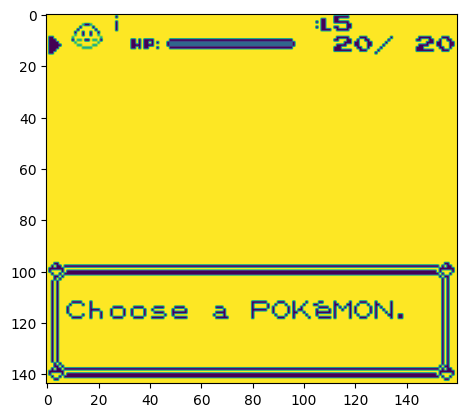

In [21]:
plt.imshow(env.render())